In [1]:
import pandas as pd
import geopandas as gpd

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
bikes = pd.read_csv('Bike_Collisions_2009-2013.csv')

In [3]:
type(bikes)

pandas.core.frame.DataFrame

In [4]:
bikes.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10526 entries, 0 to 10525
Data columns (total 89 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   X                        10426 non-null  float64
 1   Y                        10426 non-null  float64
 2   FID                      10526 non-null  int64  
 3   CASE_ID                  10526 non-null  int64  
 4   ACCIDENT_YEAR            10526 non-null  int64  
 5   PROCDATE                 10526 non-null  object 
 6   JURIS                    10526 non-null  int64  
 7   COLLISION_DATE           10526 non-null  object 
 8   COLLISION_TIME           10526 non-null  int64  
 9   OFFICER_ID               10518 non-null  object 
 10  REPORTING_DISTRICT       10267 non-null  object 
 11  DAY_OF_WEEK              10526 non-null  int64  
 12  SHIFT                    10526 non-null  int64  
 13  POPULATION               10526 non-null  int64  
 14  CNTY_CITY_LOC         

/tmp/ipykernel_50/1105019264.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  bikes.info(verbose=True, null_counts=True)


In [5]:
bikes[['X', 'Y', 'ACCIDENT_YEAR','COLLISION_DATE', 'COLLISION_TIME', 'COLLISION_SEVERITY', 'COUNT_BICYCLIST_KILLED', 'COUNT_BICYCLIST_INJURED']]

,X,Y,ACCIDENT_YEAR,COLLISION_DATE,COLLISION_TIME,COLLISION_SEVERITY,COUNT_BICYCLIST_KILLED,COUNT_BICYCLIST_INJURED
0,-118.601602,34.206749,2009,1/1/2009,1500,3,0,1
1,-118.247680,34.054989,2009,1/2/2009,1315,4,0,1
2,-118.542762,34.186565,2009,1/2/2009,515,3,0,1
3,-118.448752,34.172115,2009,1/2/2009,1525,3,0,1
4,-118.536055,34.180725,2009,1/2/2009,1130,3,0,1
...,...,...,...,...,...,...,...,...
10521,-118.313550,34.076229,2013,12/30/2013,1750,3,0,1
10522,-118.405262,34.171959,2013,12/31/2013,1305,2,0,1
10523,-118.575350,34.193790,2013,12/31/2013,1105,3,0,1
10524,-118.421338,34.315365,2013,12/31/2013,1315,3,0,1


In [6]:
trimmed = ['X', 'Y', 'ACCIDENT_YEAR', 'COLLISION_DATE', 'COLLISION_TIME', 'COLLISION_SEVERITY', 'COUNT_BICYCLIST_KILLED', 'COUNT_BICYCLIST_INJURED']

In [7]:
bikes[trimmed].tail(10)

,X,Y,ACCIDENT_YEAR,COLLISION_DATE,COLLISION_TIME,COLLISION_SEVERITY,COUNT_BICYCLIST_KILLED,COUNT_BICYCLIST_INJURED
10516,-118.370292,33.950317,2013,12/28/2013,1440,3,0,1
10517,-118.344140,34.097961,2013,12/28/2013,1530,3,0,1
10518,-118.441305,34.038178,2013,12/28/2013,1155,4,0,1
10519,-118.387822,34.212112,2013,12/29/2013,1315,3,0,1
10520,-118.450979,34.045792,2013,12/29/2013,1030,3,0,1
10521,-118.313550,34.076229,2013,12/30/2013,1750,3,0,1
10522,-118.405262,34.171959,2013,12/31/2013,1305,2,0,1
10523,-118.575350,34.193790,2013,12/31/2013,1105,3,0,1
10524,-118.421338,34.315365,2013,12/31/2013,1315,3,0,1
10525,-118.448820,34.023079,2013,12/31/2013,1410,3,0,1


In [8]:
bikes = bikes[trimmed].copy()

In [9]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10526 entries, 0 to 10525
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   X                        10426 non-null  float64
 1   Y                        10426 non-null  float64
 2   ACCIDENT_YEAR            10526 non-null  int64  
 3   COLLISION_DATE           10526 non-null  object 
 4   COLLISION_TIME           10526 non-null  int64  
 5   COLLISION_SEVERITY       10526 non-null  int64  
 6   COUNT_BICYCLIST_KILLED   10526 non-null  int64  
 7   COUNT_BICYCLIST_INJURED  10526 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 658.0+ KB


In [10]:
bikes_gdf = gpd.GeoDataFrame(
    bikes, geometry=gpd.points_from_xy(bikes.X, bikes.Y))

In [11]:
type(bikes_gdf)

geopandas.geodataframe.GeoDataFrame

In [12]:
bikes_gdf=bikes_gdf.dropna(subset=['X'])
bikes_gdf=bikes_gdf.dropna(subset=['Y'])
bikes_gdf=bikes_gdf[bikes_gdf.X != 0]
bikes_gdf=bikes_gdf[bikes_gdf.Y != 0]

<AxesSubplot:>

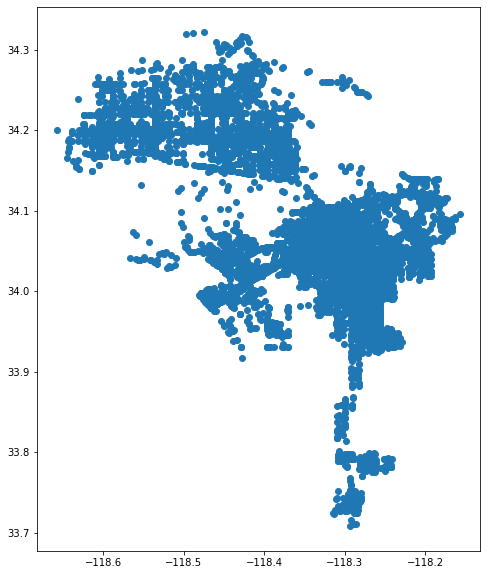

In [13]:
bikes_gdf.plot(figsize=(10,10))

In [14]:
bikes_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 9963 entries, 0 to 10525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   X                        9963 non-null   float64 
 1   Y                        9963 non-null   float64 
 2   ACCIDENT_YEAR            9963 non-null   int64   
 3   COLLISION_DATE           9963 non-null   object  
 4   COLLISION_TIME           9963 non-null   int64   
 5   COLLISION_SEVERITY       9963 non-null   int64   
 6   COUNT_BICYCLIST_KILLED   9963 non-null   int64   
 7   COUNT_BICYCLIST_INJURED  9963 non-null   int64   
 8   geometry                 9963 non-null   geometry
dtypes: float64(2), geometry(1), int64(5), object(1)
memory usage: 778.4+ KB


In [15]:
import folium

In [16]:
lat = bikes_gdf.Y.mean()
long = bikes_gdf.X.mean()

In [17]:
m = folium.Map(location=[lat,long])
m

In [18]:
def mapping(sev,year):
    for index, row in bikes_gdf.iterrows():
        if index==250:
            break
        if  row.COLLISION_SEVERITY==sev and row.ACCIDENT_YEAR==year:
            folium.Marker(
                [row.Y, row.X], 
                popup=row.COLLISION_DATE, 
                tooltip=row.COLLISION_DATE
            ).add_to(m)

In [19]:
mapping(2, 2011)

In [20]:
m

In [25]:
bikes_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 9963 entries, 0 to 10525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   X                        9963 non-null   float64 
 1   Y                        9963 non-null   float64 
 2   ACCIDENT_YEAR            9963 non-null   int64   
 3   COLLISION_DATE           9963 non-null   object  
 4   COLLISION_TIME           9963 non-null   int64   
 5   COLLISION_SEVERITY       9963 non-null   int64   
 6   COUNT_BICYCLIST_KILLED   9963 non-null   int64   
 7   COUNT_BICYCLIST_INJURED  9963 non-null   int64   
 8   geometry                 9963 non-null   geometry
dtypes: float64(2), geometry(1), int64(5), object(1)
memory usage: 778.4+ KB
